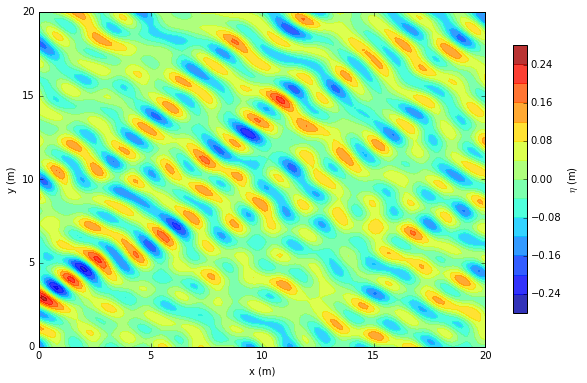

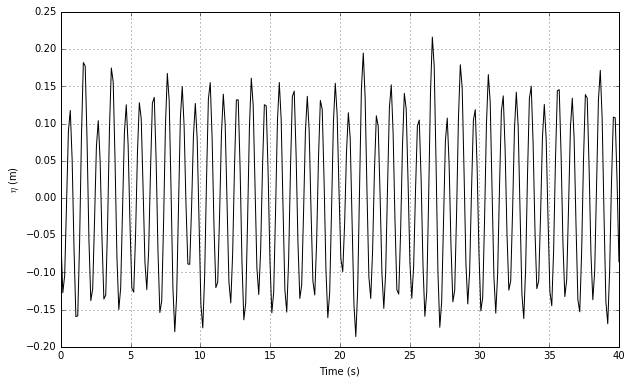

In [4]:
%matplotlib inline
from matplotlib import pyplot as plt
import imp
#The paths in the three following lines need to be changed, depending on the location of the modules
#The notebook will work with the following commits:
#WaveTools.py: https://github.com/erdc/proteus/commit/5db78fc77b50e26540188bef890259437c83ef4d
#Profiling.py: https://github.com/erdc/proteus/commit/9f4c66a59414f97861246f6fd66214ac67d849d1
#SpatialTools.py: https://github.com/erdc/proteus/commit/3c6df87d990ba5a97468088fe5f300448bec40af
Profiling = imp.load_source('Profiling', 'C:/Users/gkm/Desktop/WaveTools_nb/Profiling.py')
WT = imp.load_source('WaveTools', 'C:/Users/gkm/Desktop/WaveTools_nb/WaveTools.py')
SpatialTools = imp.load_source('SpatialTools', 'C:/Users/gkm/Desktop/WaveTools_nb/SpatialTools.py')
import numpy as np


#Setting up the plan view area
n=151
xi = np.linspace(0, 20, n)
yi = np.linspace(0, 20, n)

eta_t = np.zeros((n, n),)


#Setting up wave properties
M = 50
Tp = 2. 
Hs = 0.1
depth = 1.
mwl = 0.
N = 51
bandFactor = 2.0
g=np.array([0., 0., -9.81])
spectName = "JONSWAP"
spreadName = "cos2s"
spectral_params = None
spread_params = {"s":15}
phi = None
phiSymm = False
waveDir0 = np.array([1., 1., 0.])


#Calling the class
DW = WT.DirectionalWaves(M,
                      Tp,
                      Hs,
                      mwl,
                      depth,
                      waveDir0,
                      g,
                      N,
                      bandFactor,
                      spectName,
                      spreadName,
                      spectral_params,
                      spread_params,
                      phi,
                      phiSymm
                     )


#Calculating the free surface elevation calculated from MWL using a 2D plane
for i in range(len(xi)):
    for j in range(len(yi)):
        x = [xi[i], yi[j], 0]
        eta_t[i,j] = DW.eta(x, 0.)

        
#Plotting the contour            
plt.figure(1, figsize=(10,6), dpi=100)
X,Y = np.meshgrid(xi, yi)
CS = plt.contourf(X, Y, eta_t, 16, alpha=0.8, cmap='jet')
plt.xlabel("x (m)", size=10)
plt.ylabel("y (m)", size=10)
CB = plt.colorbar(CS, shrink=0.8, extend='both')
CB.set_label("$\eta$ (m)", size = 10)
plt.show()

#Setting up a time interval of n periods (using npoints sampling points per period)
nperiod = 20
npoints = 15
n = npoints * nperiod
tnlist=np.linspace(0,nperiod*Tp,n)
eta_t = np.zeros(len(tnlist),)


#Calculating time series
for i in range(len(tnlist)):
    x = [2., 0.5, 0.]
    t = tnlist[i]
    eta_t[i] = DW.eta(x, t)

    
#Plotting time series
plt.figure(2, figsize=(10,6), dpi=100)
plt.xlim(0., nperiod*Tp)
plt.plot(tnlist, eta_t, "k-")
plt.xlabel("Time (s)", size=10)
plt.ylabel("$\eta$ (m)", size=10)
plt.grid()
plt.show()
